# IV Temporal analysis 
## B. Demand pattern analysis

In [2]:
import os
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colrs
import seaborn as sns
from pylab import *
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy.spatial.distance import pdist,squareform
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import leaves_list
from scipy.cluster.hierarchy import complete, fcluster, linkage
from tslearn import metrics
from tslearn.clustering import TimeSeriesKMeans

/home/andre/.local/lib/python3.8/site-packages/tslearn/bases/bases.py:15: UserWarning: h5py not installed, hdf5 features will not be supported.
Install h5py to use hdf5 features: http://docs.h5py.org/
  warn(h5py_msg)


### Total traffic 

In [3]:
traffic_pandemics = pd.read_csv('../data/traffic_2020_2021/median_week_2020_21.csv')
level2019 = pd.read_csv('../data/traffic_2019/median_week_2019.csv')

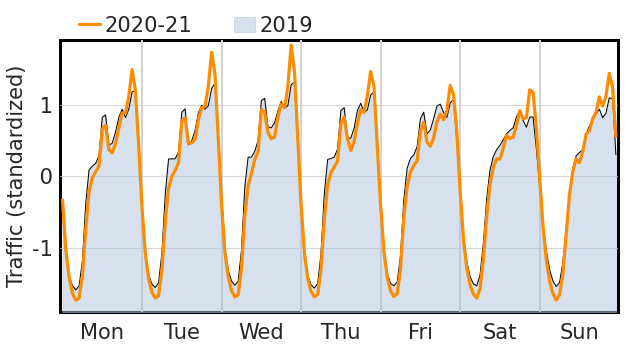

In [4]:
sns.set_style("whitegrid")
# csfont = {'fontname':'DejaVu Sans'}

fig = plt.figure(figsize=(10,5))
rc('axes', linewidth=2)
ax=fig.gca()

plt.plot(np.linspace(0,167,168),level2019['norm_total_traffic'],'black',linewidth=1,ls='-')
plt.fill_between(np.linspace(0,167,168),level2019['norm_total_traffic'],np.repeat(-1.9,168),color='lightsteelblue',alpha=0.5,label='2019')
plt.plot(np.linspace(0,167,168),traffic_pandemics['norm_total_traffic'],'darkorange',label='2020-21',linewidth=3.2,ls='-')

# plt.legend(fontsize=26,loc='upper right',handlelength=0.8,ncol=3,frameon=False,bbox_to_anchor=(1.02,1.15),handletextpad=0.2)
plt.legend(bbox_to_anchor = (0, 1.16), loc='upper left',ncol=2,  handletextpad=0.2,frameon=False,handlelength=1,fontsize=21)

ax.set_xticks([24*1,24*2,24*3,24*4,24*5,24*6])
ax.set_xticks([24*0.5,24*1.5,24*2.5,24*3.5,24*4.5,24*5.5,24*6.5],minor=True)
ax.set_xticklabels([])
ax.set_xticklabels(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'],minor=True,fontsize=21,position=(1,-0.02))

ax.set_yticks([-1,0,1])
ax.set_yticklabels(['-1',' 0',' 1'],fontsize=21)

ax.set_ylabel('Traffic (standardized)',fontsize=21)

ax.set_xlim([-0.7,167.7])
ax.set_ylim([-1.9,1.9])

ax.xaxis.labelpad = 20
ax.yaxis.labelpad = 5    
ax.grid(True, lw = 2,c ='lightgray',axis='x') 

for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(3)
    ax.spines[axis].set_color("black")
    ax.spines[axis].set_zorder(0)  

# plt.savefig('/home/jupyter-andre/2020_covid/covid_andre/images/median_weeks_2019-2020-curfews.pdf',bbox_inches='tight',dpi=200)
plt.show()

### Per service traffic

In [5]:
traffic_pandemics = pd.read_csv('../data/traffic_2020_2021/median_week_uber_2020_21.csv')
level2019 = pd.read_csv('../data/traffic_2019/median_week_uber_2019.csv')

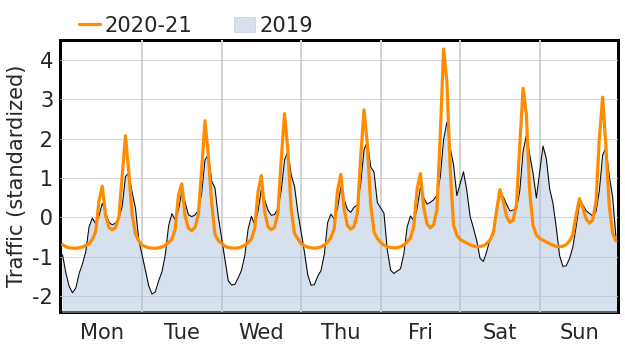

In [7]:
app = 'Uber'

fig = plt.figure(figsize=(10,5))
rc('axes', linewidth=2)
ax=fig.gca()

plt.plot(np.linspace(0,167,168),level2019['norm_total_traffic'],'black',linewidth=1,ls='-')
plt.fill_between(np.linspace(0,167,168),level2019['norm_total_traffic'],np.repeat(-3,168),color='lightsteelblue',alpha=0.5,label='2019')
plt.plot(np.linspace(0,167,168),traffic_pandemics['norm_total_traffic'],'darkorange',label='2020-21',linewidth=3.2,ls='-')

# plt.legend(fontsize=26,loc='upper right',handlelength=0.8,ncol=3,frameon=False,bbox_to_anchor=(1.02,1.15),handletextpad=0.2)
plt.legend(bbox_to_anchor = (0, 1.16), loc='upper left',ncol=2,  handletextpad=0.2,frameon=False,handlelength=1,fontsize=21)


ax.set_xticks([24*1,24*2,24*3,24*4,24*5,24*6])
ax.set_xticks([24*0.5,24*1.5,24*2.5,24*3.5,24*4.5,24*5.5,24*6.5],minor=True)
ax.set_xticklabels([])
ax.set_xticklabels(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'],minor=True,fontsize=21,position=(1,-0.02))

ax.set_yticks([-2,-1,0,1,2,3,4])
ax.set_yticklabels(['-2','-1',' 0',' 1',' 2','3','4'],fontsize=21)

ax.set_ylabel('Traffic (standardized)',fontsize=21)

ax.set_xlim([-0.7,167.7])
ax.set_ylim([-2.4,4.5])

ax.xaxis.labelpad = 20
ax.yaxis.labelpad = 5    
ax.grid(True, lw = 2,c ='lightgray',axis='x') 

for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(3)
    ax.spines[axis].set_color("black")
    ax.spines[axis].set_zorder(0)  

path = '/home/jupyter-andre/2020_covid/covid_andre/images/average_week_apps-right/filtered/median_week_'+app+'.pdf'
# plt.savefig(path,bbox_inches='tight',dpi=200)

plt.show()

### Service clustering

In [8]:
pd_dtw_stack_curfews = pd.read_csv('../data/traffic_2020_2021/dtw_values_curfews_complete.csv')
pd_metrics_2019 = pd.read_csv('../data/traffic_2019/dtw_metrics_2019_complete.csv')

In [9]:
#for the standarized cmap 
agg_curfews = ['LN-2019', 'C-2019', 'LA-2019', 'LN-C', 'LL', 'LA-C']
sep_curfews = ['LN-2019', 'C5-2019', 'C6-2019', 'LA-2019', 'C52-2019', 'LN-C5','LN-C6', 'LN-C52', 'LL', 'LA-C5', 'LA-C6', 'LA-C52', 'C5-C6', 'C5-C52','C6-C52']

pd_dtw_stack_curfews_norm = pd_metrics_2019.merge(pd_dtw_stack_curfews,how='inner',on='app')

for period in sep_curfews:
    pd_dtw_stack_curfews_norm[period] = (pd_dtw_stack_curfews_norm[period].astype('float64') - pd_dtw_stack_curfews_norm['mean'])/pd_dtw_stack_curfews_norm['std']
    

In [10]:
pd_dtw_stack_curfews_norm = pd_dtw_stack_curfews_norm.set_index('app')
pd_dtw_stack_curfews_norm = pd_dtw_stack_curfews_norm.replace(np.inf, np.nan, inplace=False)
pd_dtw_stack_curfews_norm = pd_dtw_stack_curfews_norm.dropna()

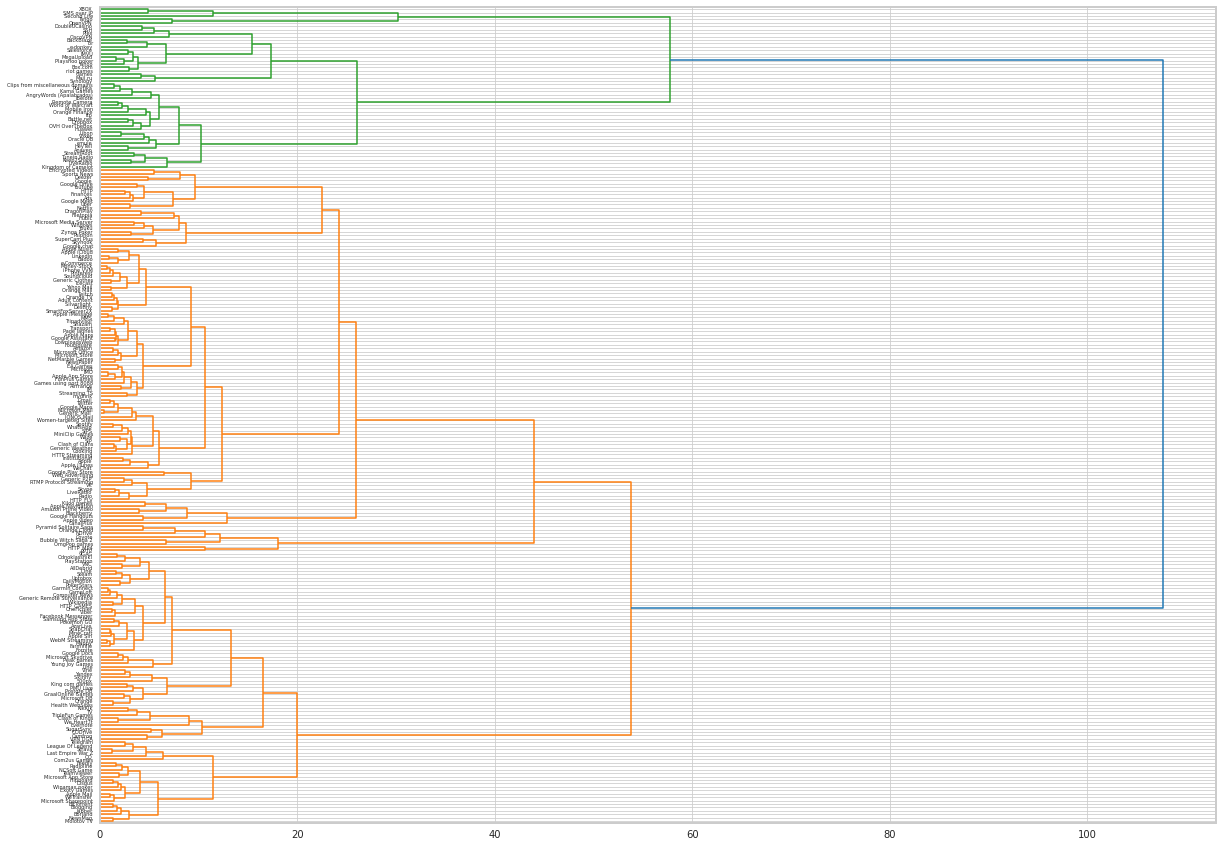

In [11]:
# pd_dtw_stack_curfews_norm = pd_dtw_stack_curfews_norm.drop(columns=['mean','std'])
# pd_dtw_stack_curfews_norm = pd_dtw_stack_curfews_norm.drop(['Tango','OpenVPN','CiscoVPN'])

distance = 'euclidean'
methodd = 'ward'

y = pdist(pd_dtw_stack_curfews_norm,metric=distance)
z = linkage(y,method=methodd,optimal_ordering=True)
plt.figure(figsize=(20,15))
dn = dendrogram(z,truncate_mode='none',p=5,labels=pd_dtw_stack_curfews_norm.index,orientation='right',distance_sort='ascending')
plt.show()

In [12]:
leaf = leaves_list(z)

reordered_dtw_stack_curfews_norm = pd.DataFrame([pd_dtw_stack_curfews_norm.iloc[leaf[0]]])

for i in range(1,pd_dtw_stack_curfews_norm.shape[0]):
    reordered_dtw_stack_curfews_norm = pd.concat([reordered_dtw_stack_curfews_norm,pd.DataFrame([pd_dtw_stack_curfews_norm.iloc[leaf[i]]])])

In [13]:
# reordered_dtw_stack_curfews_norm = reordered_dtw_stack_curfews_norm.drop(['Tango','OpenVPN','CiscoVPN'])
reordered_dtw_stack_curfews_norm = reordered_dtw_stack_curfews_norm.T

<ipython-input-25-8e4dad1cef33>:7: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  plt.tight_layout(h_pad=-0.85)


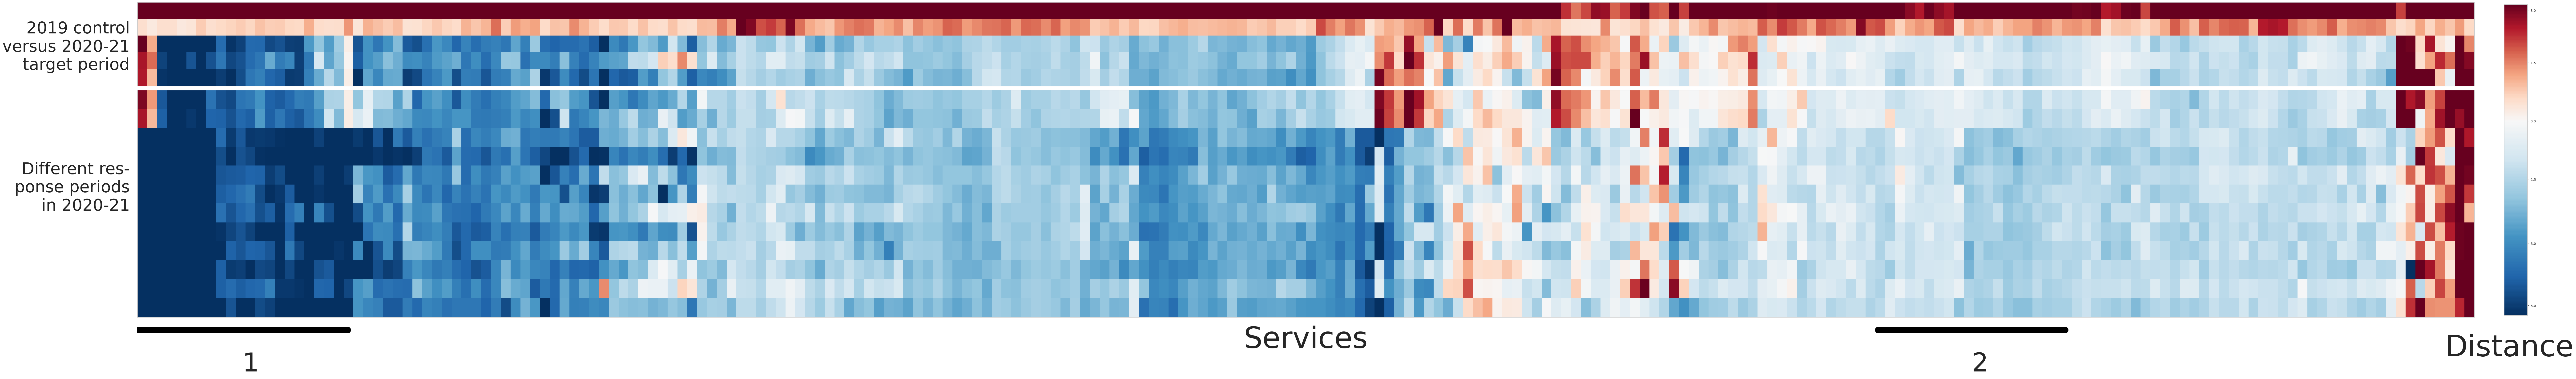

In [25]:
my_cmap = cm.get_cmap("RdBu_r")
norm = colrs.TwoSlopeNorm(vmin=-5, vmax=3,vcenter=0)

# fig definition 

fig,(ax1,ax2) = plt.subplots(2,1,figsize=(100,15),dpi=100,constrained_layout=True,gridspec_kw={'height_ratios': [1, 3]})
plt.tight_layout(h_pad=-0.85)

#starting the fig 

im1 = ax1.pcolormesh(reordered_dtw_stack_curfews_norm.iloc[0:5],cmap=my_cmap,norm=norm)  
im2 = ax2.pcolormesh(reordered_dtw_stack_curfews_norm.iloc[5:],cmap=my_cmap,norm=norm)  

ax1.invert_yaxis()
ax1.invert_xaxis()

ax2.invert_yaxis()
ax2.invert_xaxis()

# ax.axhline(y=5,color='white',lw=15)

# ax.set_yticks([2.5,10.5])
# ax.set_yticklabels(['2019 control versus 2020-21 target period ','Different response periods in 2020-21'],fontsize=80)
ax1.set_yticks([2.5])
ax1.set_yticklabels(['2019 control \nversus 2020-21 \ntarget period '],rotation=0,fontsize=50)
ax2.set_yticks([5])
ax2.set_yticklabels(['Different res- \n ponse periods \n in 2020-21 '],rotation=0,fontsize=50)

ax1.set_xticks([])
ax2.set_xticks([])

ax2.set_xlabel('Services',fontsize=90,labelpad=25)

# ax2.axhline(10,xmin=0,xmax=0.09,color='black',lw=20)
divider = make_axes_locatable(ax2)
axb = divider.append_axes("bottom", "10%", pad=0.06)
axb.invert_yaxis()
axb.axis("off")
axb.axhline(-2,0,0.09,color='black',lw=20)
axb.axhline(-2,0.745,0.825,color='black',lw=20)
axb.text(0.045,-1.6,'1',fontsize=80)
axb.text(0.785,-1.6,'2',fontsize=80)
# axb.bar([0,1],[1,1],color='black')

cbar_ax = fig.add_axes([1.01, 0.1, 0.01, 0.88]) 
cb = fig.colorbar(im1,orientation='vertical',pad=0.01,cax=cbar_ax)
cb.set_ticks([-4.75,-3.15,-1.5,0,1.5,2.85])
cb.set_ticklabels(['-5.0','-3.0','-1.5',' 0.0',' 1.5',' 3.0'])

plt.text(-25,-6.05,'Distance',rotation=0,fontsize=90)

plt.show()